# MTH9879 Homework 10

Assigned: April 19, 2018.
Due: May 10, 2018 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cC}{\mathcal{C}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

## Numerical solution of Fredholm equation

### 1. (12 points)
Consider the Fredholm equation (7) in Lecture 10:

$$
\int_0^T{G}(|t-s|)\,dx_s =\text{const.}\qquad\text{for all $t\in [0,T]$.}
$$

Define $t_i:={i}\frac T{N}$. One way to discretize this integral equation is as follows:

$$
\sum_{j=1}^N G_{ij}\,v_j=\text{const.}
$$

where $v_j=x_{t_{j}}-x_{t_{j-1}}$ and

<a name="eq:1"></a>(1)
$$
G_{ij}=
\int_{t_{i-1}}^{t_i}\,\int_{t_{j-1}}^{t_j}\,G(|t-s|)\,ds\,dt.
$$

(a) Derive an explicit expression for the $G_{ij}$ in the case
$$
G(\tau)=\frac {1}{(1+\tau)^2}.
$$
You will need to compute separate expressions for the cases $i \neq j$ and $i=j$.

(b) With $N=512$, use matrix algebra to solve equation [(1)](#eq:1) numerically with this decay kernel.

(c) Plot your results - you should end up with something like Figure 2 of Lecture 10.



### Solution

(a)

For $i \neq j$, without loss of generality, assume $i>j$ and $t>s$. The integral becomes

$$
\begin{split}
G_{ij}&=\int_{t_{i-1}}^{t_i} \int_{t_{j-1}}^{t_j} \frac{1} {(1+t-s)^2} ds dt \\
&= \int_{t_{i-1}}^{t_i} \frac{1} {1+t-t_j} dt - \int_{t_{i-1}}^{t_i} \frac{1} {1+t-t_{j-1}} dt \\
&= \ln{\left( 1+t_i-t_j \right)} - \ln{\left( 1+t_{i-1}-t_j \right)} - \ln{\left( 1+t_i-t_{j-1} \right)} + \ln{\left( 1+t_{i-1}-t_{j-1} \right)} \\
&= \ln{\left[ \frac{\left( N+(i-j) T \right)^2} {\left( N+(i-j-1) T \right) \left( N+(i-j+1) T \right)} \right]}
\end{split}
$$

As for $i=j$, The integral becomes

$$
\begin{split}
G_{ij}&=2 \int_{t_{i-1}}^{t_i} \int_{t_{i-1}}^t \frac{1} {(1+t-s)^2} ds dt \\
&=2 \int_{t_{i-1}}^{t_i} 1 dt - \int_{t_{i-1}}^{t_i} \frac{1} {1+t-t_{i-1}} dt \\
&= 2 \left( t_i-t_{i-1} \right) - 2 \ln{\left( 1+t_i-t_{i-1} \right)} \\
&= \frac{2T}{N} - 2 \ln{\left( 1+\frac{T}{N} \right)}
\end{split}
$$

In [1]:
options(warn=-1)

library(repr)
options(repr.plot.width=10,repr.plot.height=7)

In [2]:
G <- function(i,j,dt) {
    if  (i == j) {
        return (2*dt - 2*log(1 + dt))
    }
    else {
        return (log((1+abs(i-j)*dt) * (1+abs(i-j)*dt) / ((1+abs(i-j-1)*dt) * (1+abs(i-j+1)*dt))))
    } 
}

N <- 512
C <- 1/10000

Gmat <- matrix(0,N,N)
for (i in 1:N) {
    for (j in 1:N) {
        Gmat[i,j] = G(i,j,1/N)    
    }
}

const <- rep(C,N)

v <- solve(Gmat,const)

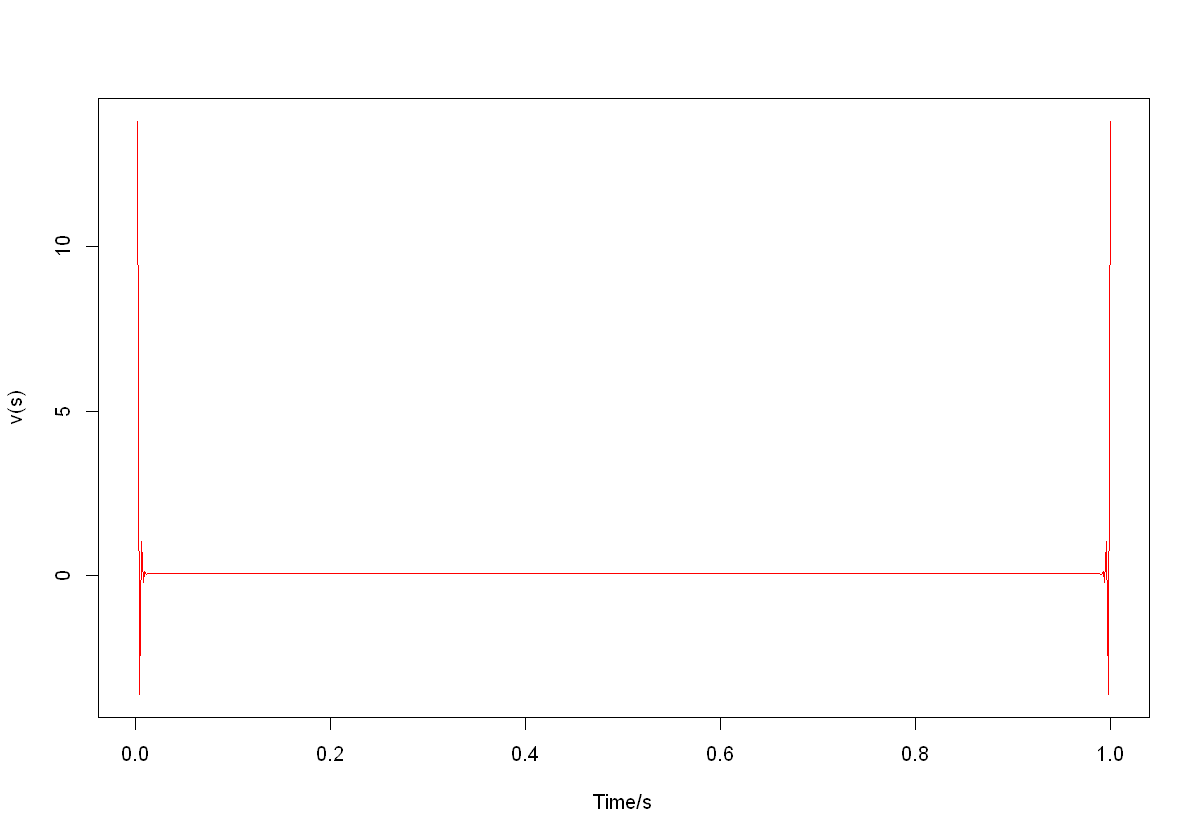

In [3]:
plot((1:N)/N, v, type="l", col="red", xlab="Time/s", ylab="v(s)")

## Optimal interval VWAP strategy in the square-root model

### 2. (12 points)

Consider equation (11) of Lecture 10 for the cost of liquidation using interval VWAPs:

$$
\cC=\sum_{j=1}^m\,C_{jj}+\sum_{i< j}^m\,C_{ji}.
$$

(a) With $m=3$ (that is 3 interval VWAP slices), and assuming the square-root process where

$$
h(v)=\frac  3 4 \sigma\,\sqrt{\frac{v}{V}} =\frac  3 4 \sigma\,\sqrt{\frac{\dot x}{V}}, 
\quad \mbox{ and } \quad
G(\tau)=1/\sqrt{\tau},
$$

compute explicit expressions for the matrix elements $C_{ji}$ in terms of $x_1$, $x_2$, $t_1$, and $t_2$ (noting that $t_0=0$ and $t_3=T$).

(b) Minimize the resulting expression for the expected cost of liquidation numerically to find optimal choices of $x_1$ and $x_2$ when $t_1=T/3$, and $t_2=2 \,T/3$.

(c) What is the percentage saving from trading with the 3-slice strategy relative to a VWAP?

(d) Explain to your non-mathematical manager why this strategy has lower expected cost.

### Solution

(a)

Cost of a three-interval VWAP strategy with square-root decay is denoted as

$$
C = \sum_{j = 1}^3 C_{jj} + \sum_{i < j}^3 C_{ji}
$$

where

$$
\begin{split}
C_{ii} &= \frac {x_i} {t_i - t_{i - 1}} h(v_i) \int_{t_{i - 1}}^{t_i} dt \int_{t_{i - 1}}^{t} \frac {1} {\sqrt{t - s}} ds =
\frac 43 x_i h(v_i) \sqrt{t_i-t_{i - 1}} \\ 
C_{ji} &= \frac {x_j} {t_{j} - t_{j - 1}} h(v_i) \int_{t_{j - 1}}^{t_j} dt \int_{t_{i - 1}}^{t_i} \frac {1} {\sqrt{t - s}} ds \\ 
&= \frac 43 x_j h(v_i) \frac {\left(t_j - t_{i - 1}\right)^{\frac 32} - \left(t_j - t_i\right)^{\frac 32} - \left(t_{j - 1} - t_{i - 1}\right)^{\frac 32} + \left(t_{j - 1} - t_i\right)^{\frac 32}} {t_j - t_{j - 1}}
\end{split}
$$

Since

$$
t_0 = 0, \, t_3 = T \\
\sum_{j = 1}^m x_j = X \\ 
v_j = \frac {x_j} {t_j - t_{j - 1}}
$$

For the fisrt sum, we have

$$
\begin{split}
C_{11} &= \frac {\sigma} {\sqrt{V}} x_1^{\frac 32} \\ 
C_{22} &= \frac {\sigma} {\sqrt{V}} x_2^{\frac 32} \\ 
C_{33} &= \frac {\sigma} {\sqrt{V}} { \left( X - x_1 - x_2 \right) }^{\frac 32}
\end{split}
$$

For the second sum,

$$
\begin{split}
C_{21} &= \sigma x_2 \sqrt{\frac {x_1} {V t_1}} \frac {t_2^{\frac 32} - \left(t_2 - t_1\right)^{\frac 32} - t_1^{\frac 32}} {t_2 - t_1} \\ 
C_{31} &= \sigma { \left( X - x_1 - x_2 \right) } \sqrt{\frac {x_1} {V t_1}} \frac {T^{\frac 32} - \left(T - t_1\right)^{\frac 32} - t_2^{\frac 32} + \left(t_2 - t_1\right)^{\frac 32}} {T - t_2} \\ 
C_{32} &= \sigma { \left( X - x_1 - x_2 \right) } \sqrt{\frac {x_2} {V (t_2 - t_1)}} \frac {\left(T - t_1\right)^{\frac 32} - \left(T - t_2\right)^{\frac 32} - \left(t_2 - t_1\right)^{\frac 32}} {T - t_2}
\end{split}
$$

(b)

As $t_1 = \frac13 T$ and $t_2 = \frac23 T$, substitute them into functions above. That is 

$$
\begin{split}
C_{21} &= \frac {\sigma} {\sqrt{V}} x_2 x_1^{\frac 12} { \left( \sqrt{8} - 1 - 1 \right) } \\ 
C_{31} &= \frac {\sigma} {\sqrt{V}} { \left( X - x_1 - x_2 \right) } x_1^{\frac 12} { \left( \sqrt{27} - \sqrt{8} - \sqrt{8} + 1 \right) } \\ 
C_{32} &= \frac {\sigma} {\sqrt{V}} { \left( X - x_1 - x_2 \right) } x_2^{\frac 12} { \left( \sqrt{8} - 1 - 1 \right) }
\end{split}
$$

As

$$
\sum_{j=1}^3 C_{jj} + \sum_{i<j}^3 C_{ji} = C_{11} + C_{22} + C_{33} + C_{21} + C_{31} + C_{32}
$$

We can optimize $C$ with the first order conditions of $x_1$ and $x_2$, as

$$
\min_{x_1,x_2} C = \min_{x_1,x_2} \left( \sum_{j=1}^3 C_{jj} + \sum_{i<j}^3 C_{ji} \right)
$$

The optimization part is realized by R coding shown below (constants like $\sigma$, $X$, and $V$ is omitted here).

In [4]:
# Craft cost function
c11 <- function(x){x[1]^(3/2)}
c22 <- function(x){x[2]^(3/2)}
c33 <- function(x){(1-x[1]-x[2])^(3/2)}
c21 <- function(x){x[2]*x[1]^(1/2)*(8^(1/2)-1-1)}
c31 <- function(x){(1-x[1]-x[2])*x[1]^(1/2)*(27^(1/2)-8^(1/2)-8^(1/2)+1)}
c32 <- function(x){(1-x[1]-x[2])*x[2]^(1/2)*(8^(1/2)-1-1)}
cost <- function(x){c11(x)+c22(x)+c33(x)+c21(x)+c31(x)+c32(x)}

# Optimization
result <- optim(c(0.1,0.1), cost, lower=c(0,0), upper=c(1,1), method="L-BFGS-B")

# Output results
x <- c("x1","x2","cost")
v <- c(result$par, result$value)
print(paste("The optimal value of", x, "is", v))

[1] "The optimal value of x1 is 0.647081191733939"  
[2] "The optimal value of x2 is 0"                  
[3] "The optimal value of cost is 0.883282064977919"


(c)

For a VWAP,

$$
C_{\text{VWAP}} = \frac {\sigma} {\sqrt{V}} X^{\frac 32}
$$

While for a 3-slice strategy,

$$
C_{\text{3-slice}} = 0.8833 \frac {\sigma} {\sqrt{V}} X^{\frac 32}
$$

Therefore, the percentage saving is

$$
\frac {C_{\text{VWAP}} - C_{\text{3-slice}}} {C_{\text{VWAP}}} = 11.64 \%
$$

(d)

When a large quantity of orders is submitted, market would need time to react. Therefore, if we submit a large number of orders at the initial time, when price goes up, our orders have already been executed. After that, price would resilience back in the second period. As a result, by the time we liquidate again, a better price could be obtained. 